# Milestone 2

## 1 - Perkenalan

- Nama : Fadhil Muhammad Irfan
- Batch : FTDS - 10
- Data source : https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
- Heroku Link : https://fadhil-irfan-10.herokuapp.com/

**Attribute Information :**

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

## 2 - Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Split Dataset
from sklearn.model_selection import train_test_split

# Feature Scaling using stamdard scaler
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Improvement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

# Pipeline
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Saving
import joblib
import pickle

## 3 - Data Loading

In [2]:
data = pd.read_excel('Concrete_Data.xls')
data_copy = data.copy()

data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Mengubah nama kolom agar lebih mempermudah penulisan selama pembentukan model.

In [3]:
data.columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'compressive_strength']

data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 4 - Exploratory Data Analysis

In [6]:
data.info()

print('jumlah missing values =', data.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   slag                  1030 non-null   float64
 2   flyash                1030 non-null   float64
 3   water                 1030 non-null   float64
 4   superplasticizer      1030 non-null   float64
 5   coarseaggregate       1030 non-null   float64
 6   fineaggregate         1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
jumlah missing values = 0


Dari `.info()` dapat diketahui:
- Tipe data yang ada didalam dataset ini adalah numerik
- Total data entries adalah 1030, dan setiap kolomnya masing-masing mempunyai nilai yang sama. Artinya, tidak ada missing values didalam dataset ini
- Maka tidak akan ada handling missing values

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
flyash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseaggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineaggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
compressive_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


Berdasarkan `.describe()`:
- Secara sekilas terlihat bahwa distribusi datanya tidak ada yang aneh yang artinya adalah tidak ada perbedaan yang jauh antara kuadran 3 dan kuadran 4
- Kecuali untuk kolom age, jika dilihat kolom age memiliki jarak yang sangat jauh antara kuadran 3 ke kuadran 4. Akan tetapi, umur beton biasanya adalah umur umur suatu beton saat diuji samplenya. Sehingga, saat umur beton sudah mencapai 28 hari dia dianggap sudah mencapai kekuatan 100 persen. Lebih dari 28 hari, kekuatan beton tidak akan mengalami kenaikan yang signifikan yang dimana jika diukur kembali saat usianya 365 hari (1 tahun) beton akan memiliki nilai 120 persen.
- Nilai maksimum dari compressive strength adalah 82.6 MPa. Beton yang dianggap sebagai beton mutu tinggi adalah beton dengan mutu rentang 40 - 80 MPa sedangkan beton yang dianggap normal adalah beton dengan mutu dibawah 40 MPa. Sehingga disini bisa diartikan terdapat ketidak sesuaian terhadap teori dimana nilai maximum nya mempunyai perbedaan 2.6 MPa terhadap teori. Hal ini bisa saja terjadi dikarenakan : instrument error dan human error selama pengujian mutu didalam lab, atau memang campuran betonnya memang bisa menghasilkan angka tersebut. Dikarenakan ketidak pastian ini, maka tidak ada handling outlier untuk compressive strength

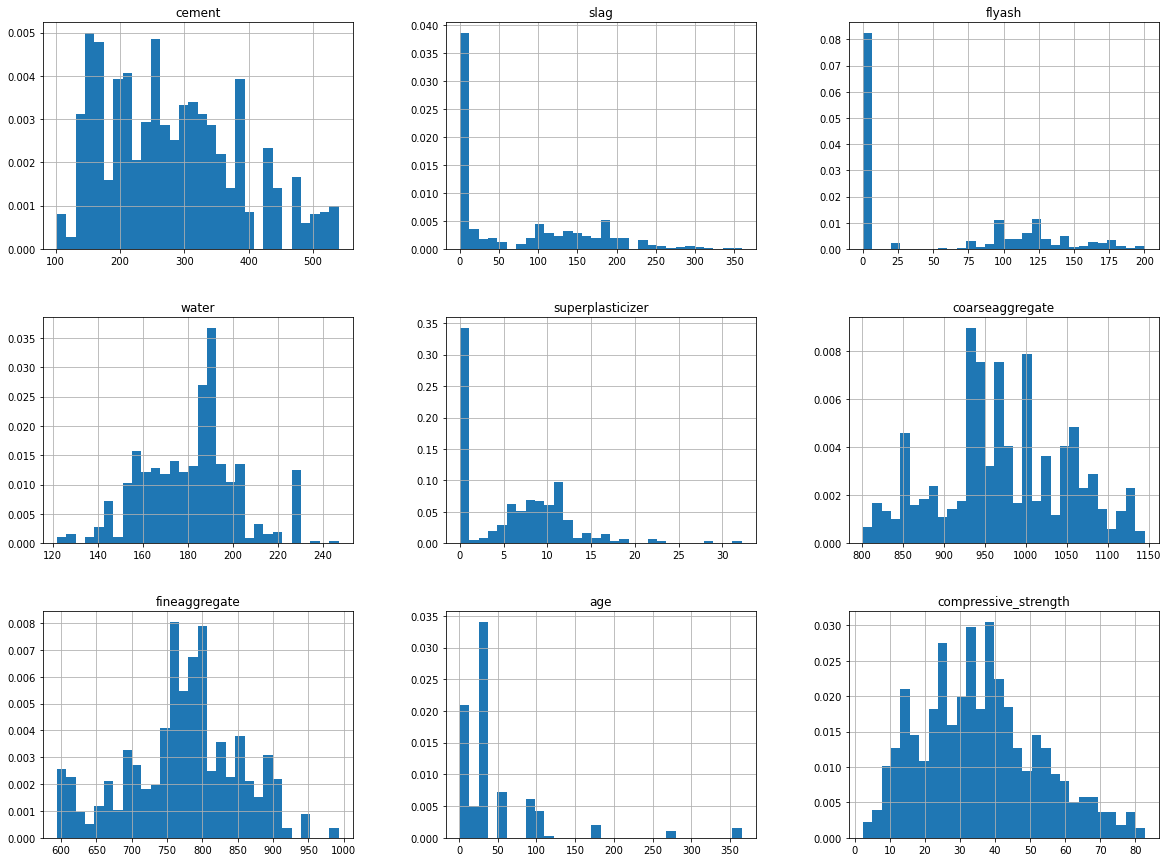

skew value :
 cement                  0.509517
slag                    0.800737
flyash                  0.537445
water                   0.074324
superplasticizer        0.908113
coarseaggregate        -0.040206
fineaggregate          -0.252979
age                     3.269177
compressive_strength    0.416922
dtype: float64


In [8]:
data.hist(bins=30, figsize=(20,15), density = True)
plt.show()

print('skew value :\n', data.skew())

Berdasarkan plot histogram:
- Slag, flyash, superplasticizer, dan age memiliki skew ke kanan
- Untuk slag, flyash, dan superplasticizer, hal ini bisa dibilang wajar jika datanya kebanyakan menunjukkan angka 0 dikarenakan ketiga kolom ini merupakan zat aditif yang tujuannya meningkatkan mutu dari beton. Sehingga, ketiga bahan kimia ini, bukanlah komponen utama dalam pembuatan beton. 
- Untuk age, datanya skew ke kanan, dimana kebanyakan datanya adalah data dibawah umur 50 hari. Hal ini juga bisa dibilang wajar, dikarenakan didalam industri konstruksi, beton biasanya didesain akan mencapai kekuatan optimal (100 persen) saat dia mencapai 28 hari. Sedangkan, data yang dibawah atau lebih dari 28 hari biasanya menyesuaikan dengan kebutuhan dilapangan.
- Untuk data cement, water, coarse aggregate dan fine aggregate, datanya terlihat terdistribusi normal dikarenakan campuran ini adalah campuran yang membentuk akan membentuk beton.

Kesimpulan dari `.describe()` dan grafik histogram: tidak ada handling outlier

<AxesSubplot:xlabel='age', ylabel='compressive_strength'>

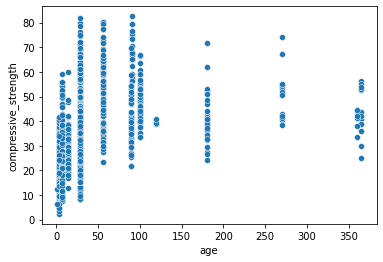

In [9]:
sns.scatterplot(data=data, x='age', y='compressive_strength')

Jika dilihat dari scatterplot compressive strength vs age:
- kebanyakan data tertumpuk dibahwa 50 hari
- terlihat ada kenaikan diantar 0 - 50 hari. Hal ini sesuai dengan teori dimana saat umur 1 hari setelah dicor sampai 28 hari dicor maka dia akan mengalami kenaikan. Melebehi dari itu perbedaanya tidak lah signifikan. 

<AxesSubplot:xlabel='fineaggregate', ylabel='compressive_strength'>

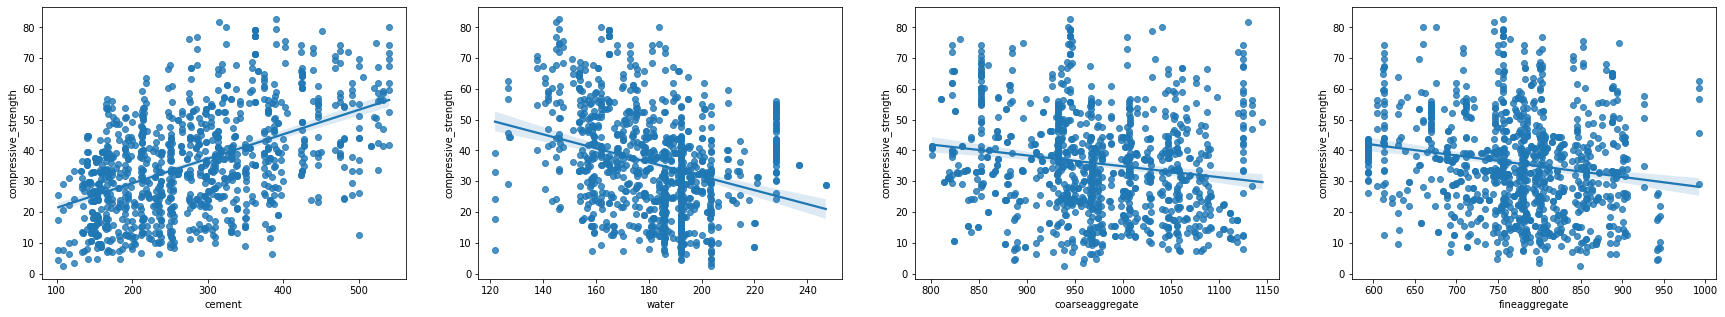

In [10]:
plt.figure(figsize=(30, 5))

plt.subplot(1,4,1)
sns.regplot(data=data, x='cement', y='compressive_strength')

plt.subplot(1,4,2)
sns.regplot(data=data, x='water', y='compressive_strength')

plt.subplot(1,4,3)
sns.regplot(data=data, x='coarseaggregate', y='compressive_strength')

plt.subplot(1,4,4)
sns.regplot(data=data, x='fineaggregate', y='compressive_strength')

Berdasarkan regplot komponen utama beton:
- cement dan water terlihat jelas hubungannya terhadap compressive strength. Dimana, saat nilai cement tinggi, compressive strength juga tinggi. Tetapi kebalikannya untuk water dimana semakin tinggi water content mutu beton menurun.
- Untuk coarse aggregate dan fine aggregate, belum terlihat dengan jelas hubungannya. Dimana, jika melihat garis regplot perbedaan nya tidak lah signifikan antara titik minimum dan maximum untuk masing-masing konten aggregate.

<AxesSubplot:xlabel='superplasticizer', ylabel='compressive_strength'>

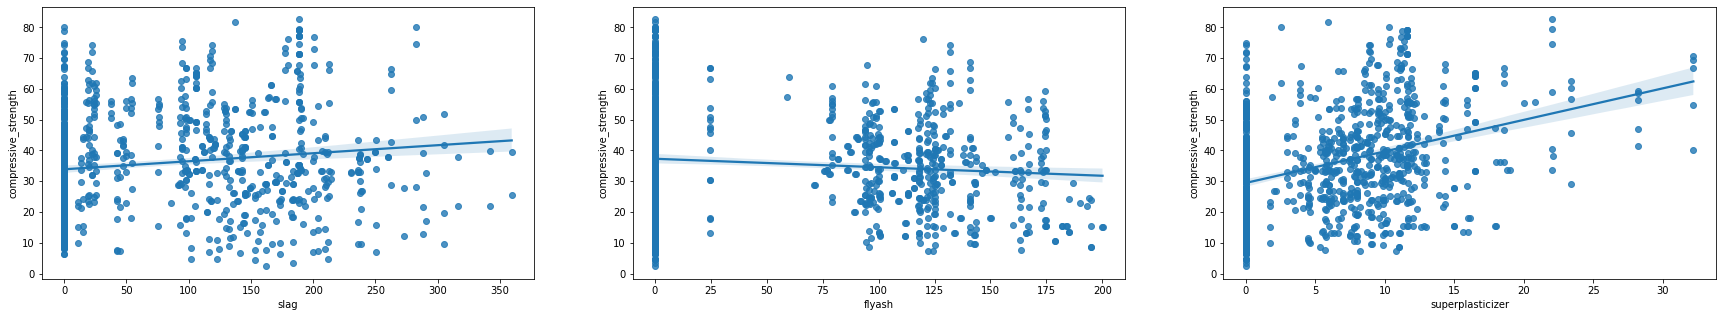

In [11]:
plt.figure(figsize=(30, 5))

plt.subplot(1,3,1)
sns.regplot(data=data, x='slag', y='compressive_strength')

plt.subplot(1,3,2)
sns.regplot(data=data, x='flyash', y='compressive_strength')

plt.subplot(1,3,3)
sns.regplot(data=data, x='superplasticizer', y='compressive_strength')

Berdasarkan regplot bahan aditif:
- tidak terlihat ada perbedaan yang signifikan, sehingga korelasi untuk kedua komponen ini terhadap compressive strength belum terlihat dengan jelas
- untuk superplasticizer, bisa dilihat bahwa nilai compressive strengthnya meningkat tinggi saat menggunakan bahan ini. Hal ini sesuai dengan teorinya, dimana superplasticizer digunakan untuk mengurangi konten air didalam concrete mixture. Sehingga, jika dihubungkan dengan plot sebelumnya, dimana saat konten air naik maka compressive strength menurun, sifat dari superplasticizer kebalikan dari water.

## 5 - Data Preprocessing

In [12]:
data_inf = data.sample(10, random_state=10)
data_train_test = data.drop(data_inf.index)
data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop = True, inplace=True)
data_inf

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,compressive_strength
0,239.60,359.4,0.00,185.70,0.00,941.6,664.30,28,39.435269
1,122.60,183.9,0.00,203.50,0.00,958.2,800.10,3,3.319827
2,491.00,26.0,123.00,201.00,3.93,822.0,699.00,28,57.915984
3,190.34,0.0,125.18,161.85,9.88,1088.1,802.59,100,40.389504
4,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
5,251.81,0.0,99.94,146.14,12.35,1006.0,899.76,100,45.367521
6,276.40,116.0,90.30,179.60,8.90,870.1,768.30,28,44.284354
7,491.00,26.0,123.00,210.00,3.93,882.0,699.00,28,55.551081
8,313.00,145.0,0.00,178.00,8.00,867.0,824.00,28,44.388465
9,307.00,0.0,0.00,193.00,0.00,968.0,812.00,90,32.922479


### Split Data Train and Test

In [13]:
X = data.drop(['compressive_strength'], axis=1)
y = data['compressive_strength']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('X_train size = ', X_train.shape)
print('X_test size = ', X_test.shape)
print('y_train size = ', y_train.shape)
print('y_test size = ', y_test.shape)

X_train size =  (824, 8)
X_test size =  (206, 8)
y_train size =  (824,)
y_test size =  (206,)


### Handling Outlier and Missing Values

Berdasarkan EDA disini kita tidak akan menghandle missing values 

### Feature Selection

**PEARSON CORRELATION**

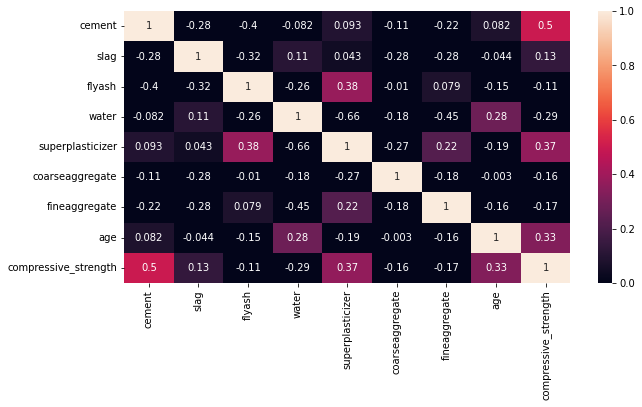

In [15]:
corr = data.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Berdasarkan Pearson Correlation:
- Sesuai dengan dugaan sebelumnya di EDA, dimana flyash, coarseaggregate, dan fineaggregate masih belum terlihat korelasinya terhadap compressive strength dimana jika dibandingkan dengan nilai korelasi didalam heatmap, hasilnya masih dibawah 0.3. 
- Cement merupakan zat yang memiliki korelasi tertinggi terhadap compressive strength dengan nilai 0.5
- Jika disesuaikan dengan teori, seluruh bahan atau kolom didalam dataset ini adalah bahan yang digunakan dalam pembuatan beton. Oleh karena itu, seluruh komponen didalam dataset ini penting untuk digunakan. 

Normalisasi feature:

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

Menyimpan scaler didalam num_pipeline

In [17]:
num_pipeline = make_pipeline(StandardScaler())

**PCA**

Sebagai perbandingan, akan dilakukan transformasi feature dengan PCA. Feature dengan dan tanpa PCA akan dibandingkan, dimana model yang terbaik berdasarkan model evaluasi lah yang akan dipilih.

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data

,feature,VIF
0,cement,15.453147
1,slag,3.415741
2,flyash,4.064320
3,water,85.253612
4,superplasticizer,5.531721
5,coarseaggregate,85.617576
6,fineaggregate,74.028839
7,age,1.722564


Jika berdasarkan nilai VIF, komponenya dapat direduksi sampai 4 kolom

In [19]:
scaler_pca = StandardScaler()
X_pca_coba = scaler_pca.fit_transform(X_train)

pca_test=PCA(n_components=8).fit(X_pca_coba)
pca_test.explained_variance_ratio_

array([0.29125242, 0.17790287, 0.16504578, 0.12597157, 0.11621488,
       0.09776515, 0.02205618, 0.00379115])

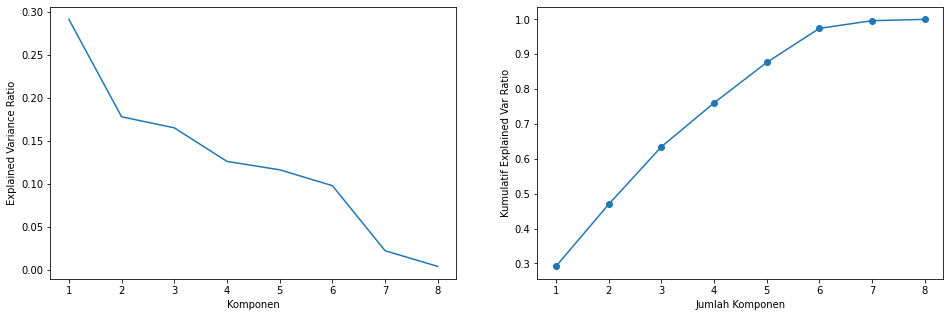

In [20]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,9),pca_test.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,9),np.cumsum(pca_test.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

- Berdasarkan Kumulatif Variance Ratio, terdapat tekukan di jumlah komponen 6.
- Maka komponen akan di reduced sampai dengan 6 komponen yang dimana dia akan membawa informasi diatas 90 persen.

In [21]:
pca=PCA(n_components=6)
pca.fit(X_train_final)

X_train_reduced = pca.transform(X_train_final)
X_test_reduced = pca.transform(X_test_final)

Skala hasil PCA

In [22]:
scaler2 = StandardScaler()
scaler2.fit(X_train_reduced)

X_train_reduced_final = scaler2.transform(X_train_reduced)
X_test_reduced_final = scaler2.transform(X_test_reduced)

## 6 - Model Definition and Training

**TANPA PCA**

In [23]:
lr = LinearRegression()
lr.fit(X_train_final, y_train)

y_train_predict_lr = lr.predict(X_train_final)
y_test_predict_lr = lr.predict(X_test_final)

In [24]:
dt = DecisionTreeRegressor()
dt.fit(X_train_final, y_train)

y_train_predict_dt = dt.predict(X_train_final)
y_test_predict_dt = dt.predict(X_test_final)

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train_final, y_train)

y_train_predict_rf = rf.predict(X_train_final)
y_test_predict_rf = rf.predict(X_test_final)

In [26]:
knn = KNeighborsRegressor()
knn.fit(X_train_final, y_train)

y_train_predict_knn = knn.predict(X_train_final)
y_test_predict_knn = knn.predict(X_test_final)

**DENGAN PCA**

In [27]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_reduced_final, y_train)

y_train_predict_lr_pca = lr_pca.predict(X_train_reduced_final)
y_test_predict_lr_pca = lr_pca.predict(X_test_reduced_final)

In [28]:
dt_pca = DecisionTreeRegressor()
dt_pca.fit(X_train_reduced_final, y_train)

y_train_predict_dt_pca = dt_pca.predict(X_train_reduced_final)
y_test_predict_dt_pca = dt_pca.predict(X_test_reduced_final)

In [29]:
rf_pca = RandomForestRegressor()
rf_pca.fit(X_train_reduced_final, y_train)

y_train_predict_rf_pca = rf_pca.predict(X_train_reduced_final)
y_test_predict_rf_pca = rf_pca.predict(X_test_reduced_final)

In [30]:
knn_pca = KNeighborsRegressor()
knn_pca.fit(X_train_reduced_final, y_train)

y_train_predict_knn_pca = knn_pca.predict(X_train_reduced_final)
y_test_predict_knn_pca = knn_pca.predict(X_test_reduced_final)

## 7 - Model Evaluation

**TANPA PCA**

Linear Regression

In [31]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_lr))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_lr))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_lr))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_lr))

print('r2score train = ', r2_score(y_train, y_train_predict_lr))
print('r2score test = ', r2_score(y_test, y_test_predict_lr))

train =  105.27745507398824
test =  118.08909177196502
train =  8.151830862139256
test =  8.323537967070136
train =  0.6201348846254064
test =  0.5857647246646861


Pada permodelan Logistic Regression:
- Model cenderung overfit, dimana data train lebih besar daripada data test dengan perbedaan yang cukup signifikan dilihat dari r2score
- Nilai MSE, MAE, dan r2score dari test adalah: 105.27, 8.32, dan 0.58. 
- Yang artinya nilai MAE dan MSE menunjukkan perkiraan +- dari data aktual. Artinya semakin mendekati angka 0 model ini lebih akurat. Jadi disini 73 persen hasil prediksinya akan mendekati aktual. Semakin r2score mendekati angka 1 atau 100 persen maka lebih baik
- Sedangkan r2scoere menunjukkan ke akuratan prediksi terhadap aktual dalam bentuk persentase. Jadi disini 58 persen hasil prediksinya akan mendekati aktual.

DECISION TREE

In [32]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_dt))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_dt))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_dt))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_dt))

print('r2score train = ', r2_score(y_train, y_train_predict_dt))
print('r2score test = ', r2_score(y_test, y_test_predict_dt))

train =  0.917414014699451
test =  76.79763792883783
train =  0.06904840756915041
test =  4.678731700256855
train =  0.996689760592188
test =  0.73060771138807


Pada permodelan Decision Tree:
- Model sangat overfit, dimana data train lebih besar daripada data test dengan perbedaan yang signifikan dilihat dari ketiga metrics yang digunakan
- Nilai MSE, MAE, dan r2score dari test adalah: 76.79, 4.67, dan 0.73
- Yang artinya nilai MAE dan MSE menunjukkan perkiraan +- dari data aktual. Artinya semakin mendekati angka 0 model ini lebih akurat.
- Sedangkan r2scoere menunjukkan ke akuratan prediksi terhadap aktual dalam bentuk persentase. Jadi disini 73 persen hasil prediksinya akan mendekati aktual. Semakin r2score mendekati angka 1 atau 100 persen maka lebih baik
- Dilihat dari hasil test, jika model ini terjadi peningkatan dibandingkan logistic regression.

RANDOM FOREST

In [33]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_rf))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_rf))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_rf))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_rf))

print('r2score train = ', r2_score(y_train, y_train_predict_rf))
print('r2score test = ', r2_score(y_test, y_test_predict_rf))

train =  4.030628812730573
test =  31.12361262433584
train =  1.3131452199824658
test =  3.7254625595951896
train =  0.9854565701849078
test =  0.8908239698399293


Pada permodelan Random Forest:
- Model sangat overfit seperti decision tree, dimana data train lebih besar daripada data test dengan perbedaan yang signifikan dilihat dari ketiga metrics yang digunakan
- Nilai MSE, MAE, dan r2score dari test adalah: 31.12, 3.72, dan 0.89
- Yang artinya nilai MAE dan MSE menunjukkan perkiraan +- dari data aktual. Artinya semakin mendekati angka 0 model ini lebih akurat.
- Sedangkan r2scoere menunjukkan ke akuratan prediksi terhadap aktual dalam bentuk persentase. Jadi disini 89 persen hasil prediksinya akan mendekati aktual. Semakin r2score mendekati angka 1 atau 100 persen maka lebih baik
- Dilihat dari hasil test, jika model ini terjadi peningkatan dibandingkan logistic regression dan decision tree

K_NEIGHBORS REGRESSOR

In [34]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_knn))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_knn))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_knn))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_knn))

print('r2score train = ', r2_score(y_train, y_train_predict_knn))
print('r2score test = ', r2_score(y_test, y_test_predict_knn))

train =  50.21873770840212
test =  79.13425862643817
train =  5.470471271318651
test =  6.736751800240513
train =  0.8187993186180089
test =  0.7224112666233516


Pada permodelan Random Forest:
- Model sangat overfit, dimana data train lebih besar daripada data test dengan perbedaan yang signifikan dilihat dari ketiga metrics yang digunakan
- Nilai MSE, MAE, dan r2score dari test adalah: 79.13, 6.73, dan 0.72
- Yang artinya nilai MAE dan MSE menunjukkan perkiraan +- dari data aktual. Artinya semakin mendekati angka 0 model ini lebih akurat.
- Sedangkan r2scoere menunjukkan ke akuratan prediksi terhadap aktual dalam bentuk persentase. Jadi disini 72 persen hasil prediksinya akan mendekati aktual. Semakin r2score mendekati angka 1 atau 100 persen maka lebih baik
- Dilihat dari hasil test, jika model ini ada diatas logistic regression dan dibawah model decision tree dengan perbedaan yang kecil didalam metrics

**DENGAN PCA**

**LINEAR REGRESSION**

In [35]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_lr_pca))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_lr_pca))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_lr_pca))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_lr_pca))

print('r2score train = ', r2_score(y_train, y_train_predict_lr_pca))
print('r2score test = ', r2_score(y_test, y_test_predict_lr_pca))

train =  117.96203191717157
test =  137.725210082791
train =  8.668856140567058
test =  9.217882964873338
train =  0.5743660327603286
test =  0.5168847565579888


Berdasarkan linear regression dengan PCA:
- Terjadi penurunan didalam hasil mse, mae, dan r2score dibandingkan dengan model Logistic tanpa PCA

**DECISION TREE**

In [36]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_dt_pca))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_dt_pca))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_dt_pca))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_dt_pca))

print('r2score train = ', r2_score(y_train, y_train_predict_dt_pca))
print('r2score test = ', r2_score(y_test, y_test_predict_dt_pca))

train =  0.917414014699451
test =  91.57426543346425
train =  0.06904840756915041
test =  6.769257358228643
train =  0.996689760592188
test =  0.6787739622156552


Berdasarkan decision tree dengan PCA:
- Terjadi penurunan didalam hasil mse, mae, dan r2score dibandingkan dengan model Decision tree tanpa PCA

**RANDOM FOREST**

In [37]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_rf_pca))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_rf_pca))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_rf_pca))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_rf_pca))

print('r2score train = ', r2_score(y_train, y_train_predict_rf_pca))
print('r2score test = ', r2_score(y_test, y_test_predict_rf_pca))

train =  8.550331368815545
test =  44.12385761773594
train =  2.103269720949343
test =  5.097175238517728
train =  0.9691484505431531
test =  0.8452214507294716


Berdasarkan random forest dengan PCA:
- Terjadi penurunan didalam hasil mse, mae, dan r2score dibandingkan dengan model Random Forest tanpa PCA

**K_NEIGBORS**

In [38]:
print('MSE train = ', mean_squared_error(y_train, y_train_predict_knn_pca))
print('MSE test = ', mean_squared_error(y_test, y_test_predict_knn_pca))

print('MAE train = ', mean_absolute_error(y_train, y_train_predict_knn_pca))
print('MAE test = ', mean_absolute_error(y_test, y_test_predict_knn_pca))

print('r2score train = ', r2_score(y_train, y_train_predict_knn_pca))
print('r2score test = ', r2_score(y_test, y_test_predict_knn_pca))

train =  50.04132414489324
test =  72.28844880099999
train =  5.396734132092523
test =  6.615308300866829
train =  0.8194394672967925
test =  0.7464251350965683


Berdasarkan logistic regression dengan PCA:
- Terjadi peningkatan didalam hasil model K-neigbors dibandingkan dengan nilai tanpa pcanya. Dimana di r2score test terdapat kenaikan 0.2

### Summary

- Semua model yang di run terlihat overfit, dimana terdapat perbedaan antara train dan test dengan nilai yang signifikan
- Model terbaik adalah model Random Forest Regressor tanpa PCA dengan nilai mse, mae, dan r2score yaitu : 31.12, 3.72, dan 0.89
- Model ini adalah model yang akan dilakukan improvement dan dituning sehingga nilai metricnya akan menjadi lebih baik.

## Model Improvement

Pada bagian ini, teknik improvement yang akan diaplikasikan kepada model terbaik berdasarkan Model Evaluation (Random Forest Regressor tanpa PCA) adalah ensemble dan juga hyperparameter tuning

**Ensemble Learning**

Ensemble method yang akan digunakan adalah Bagging dan Adaboost

BAGGING

In [39]:
bag_rf = BaggingRegressor(
    RandomForestRegressor(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

bag_rf.fit(X_train_final, y_train)

y_pred_boost = bag_rf.predict(X_test)

In [40]:
print('MSE test = ', mean_squared_error(y_test, y_pred_boost))
print('MAE test = ', mean_absolute_error(y_test, y_pred_boost))
print('r2score test = ', r2_score(y_test, y_pred_boost))

test =  574.2781030947493
test =  20.3320433642655
test =  -1.0144642031277842


- Berdasarkan hasil bagging, model mengalami penurunan performa. Dimana jika diliat, nilai MSE dan MAE nya meningkat.
- sedangkan nilai r2score nya menyentuh angka negativ yang seharusnya tidak mungkin terjadi. Sehingga model bagging tidak akan digunakan sebagai model terpilih

ADABOOST

In [41]:
adaboost = AdaBoostRegressor(RandomForestRegressor())
adaboost.fit(X_train_final, y_train)

y_pred_ada = adaboost.predict(X_test_final)

In [42]:
print('MSE test = ', mean_squared_error(y_test, y_pred_ada))
print('MAE test = ', mean_absolute_error(y_test, y_pred_ada))
print('R2 test = ', r2_score(y_test, y_pred_ada))

MSE test =  27.565333929170663
MAE test =  3.7035359084357697
R2 test =  0.9033057709351381


- Berdasarkan nilai mse dan mae, terdapat peningkatan performa. Dimana nilai mse dan mae mengalami sedikit penurunan sehingga model ini lebih baik dibandingkan model sebelum di boosting.
- Jika melihat dari r2score, nilainya mengalami kenaikan dimana model seblum boost nilai r2nya adalah 0.89, setelah di boost nilainya meningkat menjadi 0.9

**Hyperparameter Tuning**

Hyperparameter akan ditune dengan gridsearch cv kepada model terbaik yaitu model RandomForest Regressor, yang dimana sebagai pembanding. Akan dibandingkan sebelum dan sesudah menggunakan adaboost

RANDOM FOREST TUNING SEBELUM BOOSTING

In [43]:
# Number of trees in random forest
n_estimators = [100, 200, 500]
# Maximum number of levels in tree
max_depth = [None, 2, 3, 5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
# Create the random grid
grid_search = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(grid_search)

{'n_estimators': [100, 200, 500], 'max_depth': [None, 2, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}


In [44]:
clf = GridSearchCV(rf, grid_search, cv=10)
tune_model = clf.fit(X_train_final,y_train)

y_pred = tune_model.predict(X_test_final)

print(tune_model.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
print('MSE test = ', mean_squared_error(y_test, y_pred))
print('MAE test = ', mean_absolute_error(y_test, y_pred))
print('r2score test = ', r2_score(y_test, y_pred))

test =  30.5131627799431
test =  3.701004951120605
test =  0.8929653179998316


Jika dilihat dari nilai metricsnya, terjadi kenaikan yang tidak signifikan dari model Random forest tanpa boosting

RANDOM FOREST DENGAN ADABOOST

In [59]:
parameters = {'base_estimator__max_depth':[None, 2, 3, 5],
              'base_estimator__min_samples_split':[2, 5, 10],
              'base_estimator__min_samples_leaf':[1, 2, 5]}

ab_tune = GridSearchCV(adaboost, parameters, cv=10)

ab_tune.fit(X_train_final, y_train)
y_pred_ab = tune_model.predict(X_test_final)

In [60]:
print(ab_tune.best_params_)

{'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2}


In [61]:
print('test = ', mean_squared_error(y_test, y_pred_ab))
print('test = ', mean_absolute_error(y_test, y_pred_ab))
print('test = ', r2_score(y_test, y_pred_ab))

test =  30.5131627799431
test =  3.701004951120605
test =  0.8929653179998316


Setelah dituning, nilainya mengalami penurunan dibandingkan dengan Random Forest dengan Adaboost

### Kesimpulan

- Model terpilih (model final) yang akan disave dan digunakan saat deployment adalah model Random Forest dengan Adaboost yang hyperparameternya adalah default.
- Model ini mengalami kenaikan dari nilai metricsnya dimana sebelumnya adalah 0.89 sebelum di boost berubah menjadi 0.90
- Model stelah tuning ternyata mengalami penurunan, sehingga model boost dan random forest default lah yang digunakan. 

## Model Saving

Menggabungngkan algoritma di dalam preprocessing dengan model final menggunakan pipeline

In [48]:
pipe = make_pipeline(num_pipeline, AdaBoostRegressor(RandomForestRegressor()))

Melakukan uji coba untuk membuktikan jika pipeline bekerja dengan baik

In [49]:
pipe.fit(X_train, y_train)

y_pred_pipe = pipe.predict(X_test)
print('test = ', mean_squared_error(y_test, y_pred_pipe))
print('test = ', mean_absolute_error(y_test, y_pred_pipe))
print('test = ', r2_score(y_test, y_pred_pipe))

test =  27.39078005959657
test =  3.682935133650601
test =  0.9039180744861172


Setelah di fit model dengan pipeline, hasil metrics sesuai dengan langkah sebelumnya. Maka pipeline bekerja dengan baik

Menyimpan permodelan / pipeline dengan joblib

In [62]:
joblib.dump(pipe, "model.pkl")

['model.pkl']

## Model Inference

In [63]:
data_inf.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,compressive_strength
0,239.60,359.4,0.00,185.70,0.00,941.6,664.30,28,39.435269
1,122.60,183.9,0.00,203.50,0.00,958.2,800.10,3,3.319827
2,491.00,26.0,123.00,201.00,3.93,822.0,699.00,28,57.915984
3,190.34,0.0,125.18,161.85,9.88,1088.1,802.59,100,40.389504
4,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902


In [64]:
X_inf = data_inf.drop(['compressive_strength'], axis=1)
y_inf = data_inf['compressive_strength']

Melakukan predict dengan pipeline

In [65]:
y_pred_inf = pipe.predict(X_inf)

In [66]:
y_pred_inf

array([38.88817009,  6.82259944, 54.31117003, 43.99118881, 36.50629251,
       46.85678896, 44.30102553, 52.365519  , 43.36233843, 33.67284952])

Concat hasil prediksi dengan data inference

In [68]:
y_df = pd.DataFrame(y_pred_inf, columns=['pred'])
inf_pred = pd.concat([data_inf, y_df] , axis=1)

inf_pred

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,compressive_strength,pred
0,239.60,359.4,0.00,185.70,0.00,941.6,664.30,28,39.435269,38.888170
1,122.60,183.9,0.00,203.50,0.00,958.2,800.10,3,3.319827,6.822599
2,491.00,26.0,123.00,201.00,3.93,822.0,699.00,28,57.915984,54.311170
3,190.34,0.0,125.18,161.85,9.88,1088.1,802.59,100,40.389504,43.991189
4,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902,36.506293
5,251.81,0.0,99.94,146.14,12.35,1006.0,899.76,100,45.367521,46.856789
6,276.40,116.0,90.30,179.60,8.90,870.1,768.30,28,44.284354,44.301026
7,491.00,26.0,123.00,210.00,3.93,882.0,699.00,28,55.551081,52.365519
8,313.00,145.0,0.00,178.00,8.00,867.0,824.00,28,44.388465,43.362338
9,307.00,0.0,0.00,193.00,0.00,968.0,812.00,90,32.922479,33.672850


- Terlihat bahwa hasil prediksi dengan aktual nya memiliki perbedaan +- 3 dari aktual sesuai dengan hasil MAE test di permodelan.

## Kesimpulan

- Tidak ada missing values sehingga tidak ada handling missing values
- Berdasarkan `.describe` dan grafik histogram di EDA, tidak ada handling outliers
- Semua feature adalah feature yang akan dimasukkan dalam permodelan. hal ini dikarenakan setiap model merupakan komponen penting dalam pembuatan beton
- Berdasarkan model evaluasi, model tanpa PCA adalah model yang terbaik. Dikarenakan, dari ketiga model (linear regression, decision stree, dan random forest) setelah dilakukan pca terjadi penurunan performa dari model. Sehingga model yang akan di improve adalah model tanpa PCA.
- Berdasarkan evaluasi tiap metricsnya, model random forest regressor adalah model terbaik dengan nilai mse, mae, dan r2score yaitu 31.12, 3.72, dan 0.89.
- Metode improvement yang diaplikasikan kepada model terpilih (Random Forest tanpa PCA) adalah ensemble dan hyperparameter tuning dengan gridsearch
- Model terbaik didalam ensemble adalah model dengan adaboost yang hyperparameternya adalah default. Nilai test MSE, MAE, dan r2score nya adalah 27.5, 3.68, dan 0.90
- Setelah dituning menggunakan gridsearch, nilai mengalami penurunan didalam metrics sehingga parameter yang digunakan adalah default.
- Oleh karena itu, model terpilih adalah model AdaboostRegressor dengan Random Forest regressor tanpa PCA.
- Model berkerja dengan baik setelah diaplikasikan ke data inference. Dimana hasil prediksi memiliki perbedaan +- 3 dari aktualnya.

Analisa model terhadap kebutuhan di industri konstruksi:
- Dari nilai MAE yaitu +- 3.68, bisa dibilang bahwa model ini belum bisa menggantikan quality control atau hasil lab didalam proyek konstruksi
- Tetapi, model ini dirasa sudah cukup untuk memperkirakan komponen apa saja yang dibutuhkan untuk membentuk suatu beton jika digunakan didalam pabrik beton